<a href="https://colab.research.google.com/github/lmcanavals/dip/blob/main/samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform, data
from skimage.exposure import equalize_hist
import cv2

## Cargando imagen y transformación a RGB

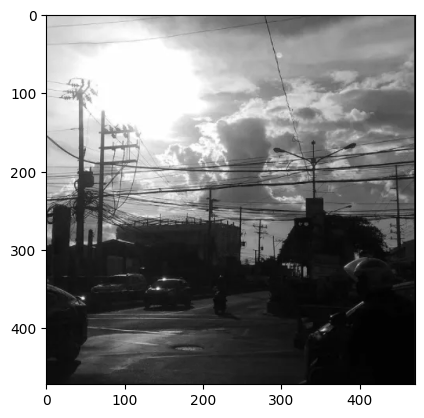

In [ ]:
imgrgb = imread('Capture.png')
img = rgb2gray(imgrgb[:,:,:3])
plt.imshow(img, cmap='gray')

## Transformada de fourier sobre imagen RGB

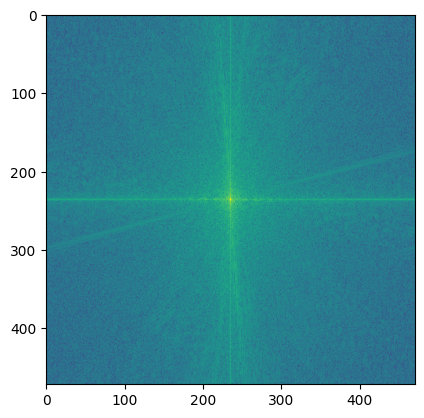

In [ ]:
imgf = np.fft.fftshift(np.fft.fft2(img))
plt.imshow(np.log(abs(imgf)))

## Filtros simples

In [ ]:
def showImg(img, imgf, imgfmasked, imgtransformed):
    fig, ax = plt.subplots(2, 2, figsize=(16, 16))

    ax[0, 0].set_title('Espectro de frecuencia')
    ax[0, 0].imshow(np.log(abs(imgf)))
    ax[0, 0].axis('off')

    ax[0, 1].set_title('Esp. frec. filtrado')
    ax[0, 1].imshow(np.log(abs(imgfmasked)))
    ax[0, 1].axis('off')

    ax[1, 0].set_title('Original')
    ax[1, 0].imshow(img, cmap='gray')
    ax[1, 0].axis('off')

    ax[1, 1].set_title('Transformada')
    ax[1, 1].imshow(imgtransformed, cmap='gray')
    ax[1, 1].axis('off')

    plt.show()


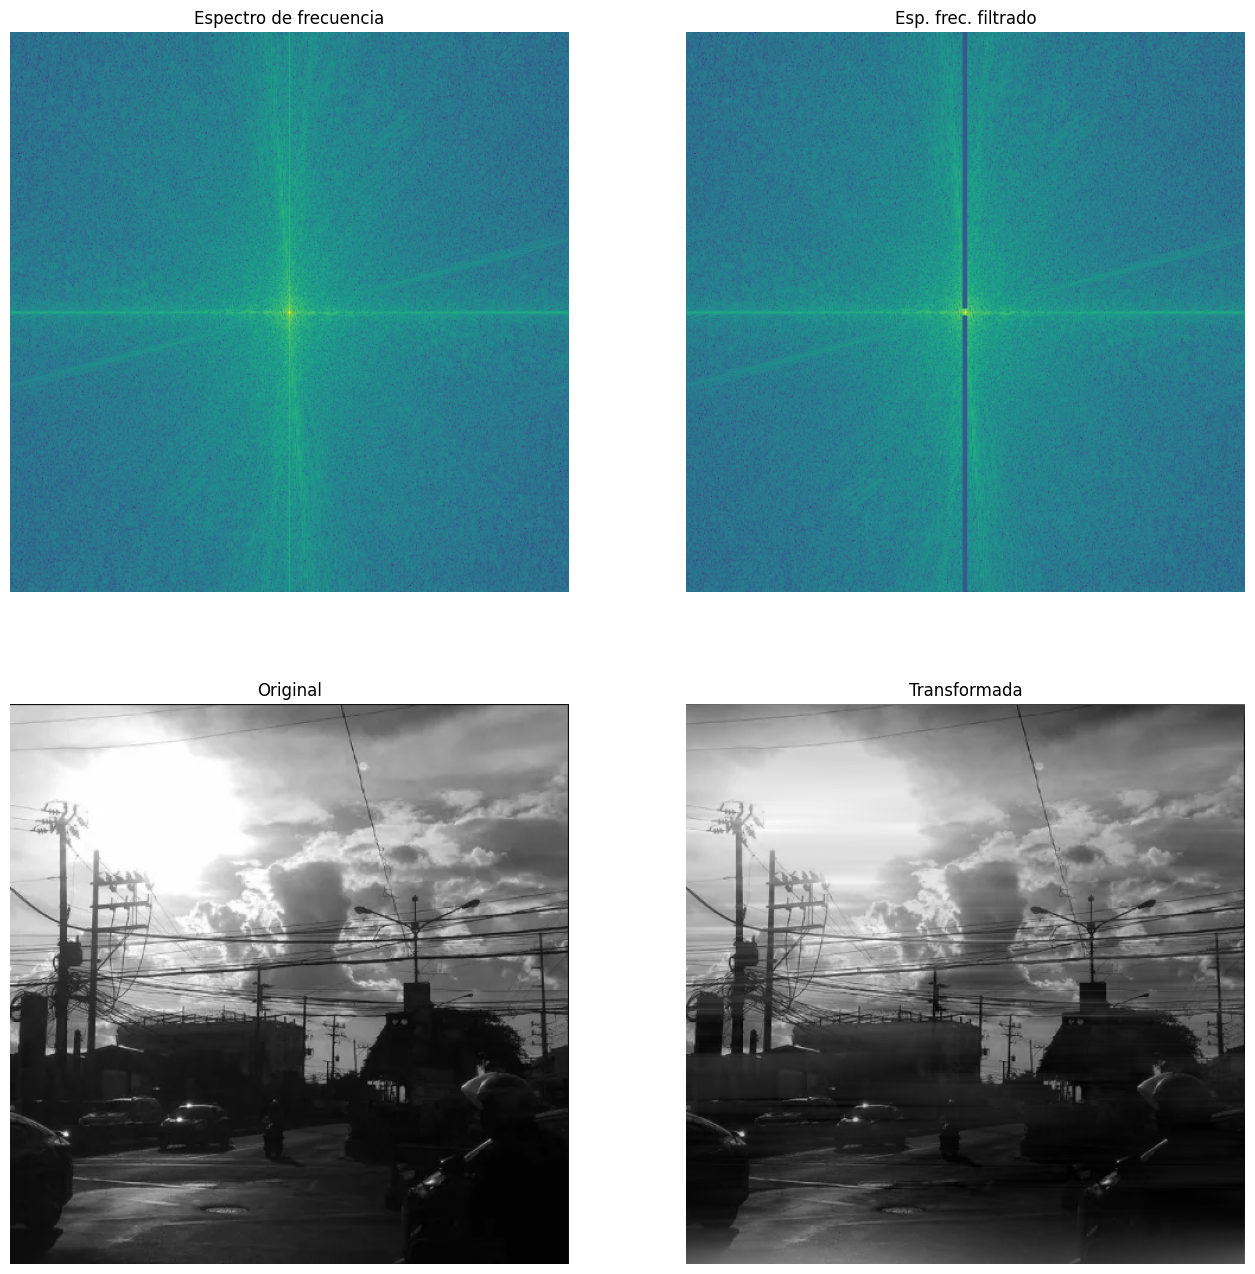

In [ ]:
def fourier_masker(img, i):
    imgf = np.fft.fftshift(np.fft.fft2(img))
    imgfmasked = imgf.copy()
    n, m = img.shape
    imgfmasked[:n//2-3, m//2 - 2:m//2 + 2] = i
    imgfmasked[-n//2+3:, m//2 - 2:m//2 + 2] = i
    imgtransformed = abs(np.fft.ifft2(imgfmasked))

    showImg(img, imgf, imgfmasked, imgtransformed)


fourier_masker(img, 1)

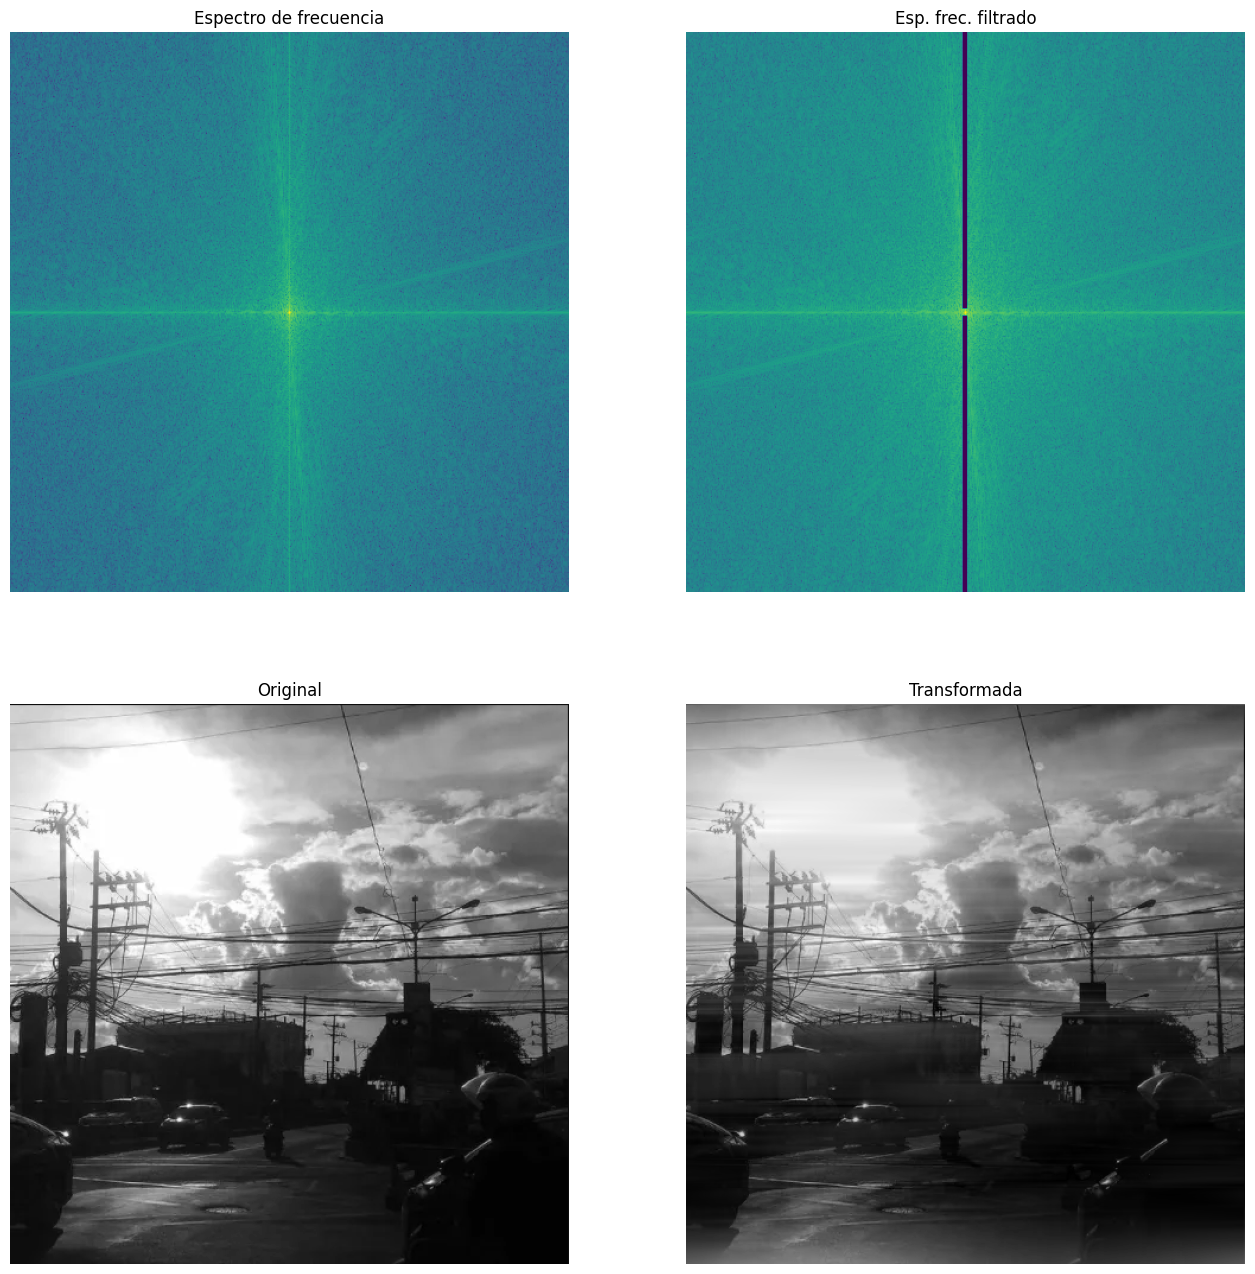

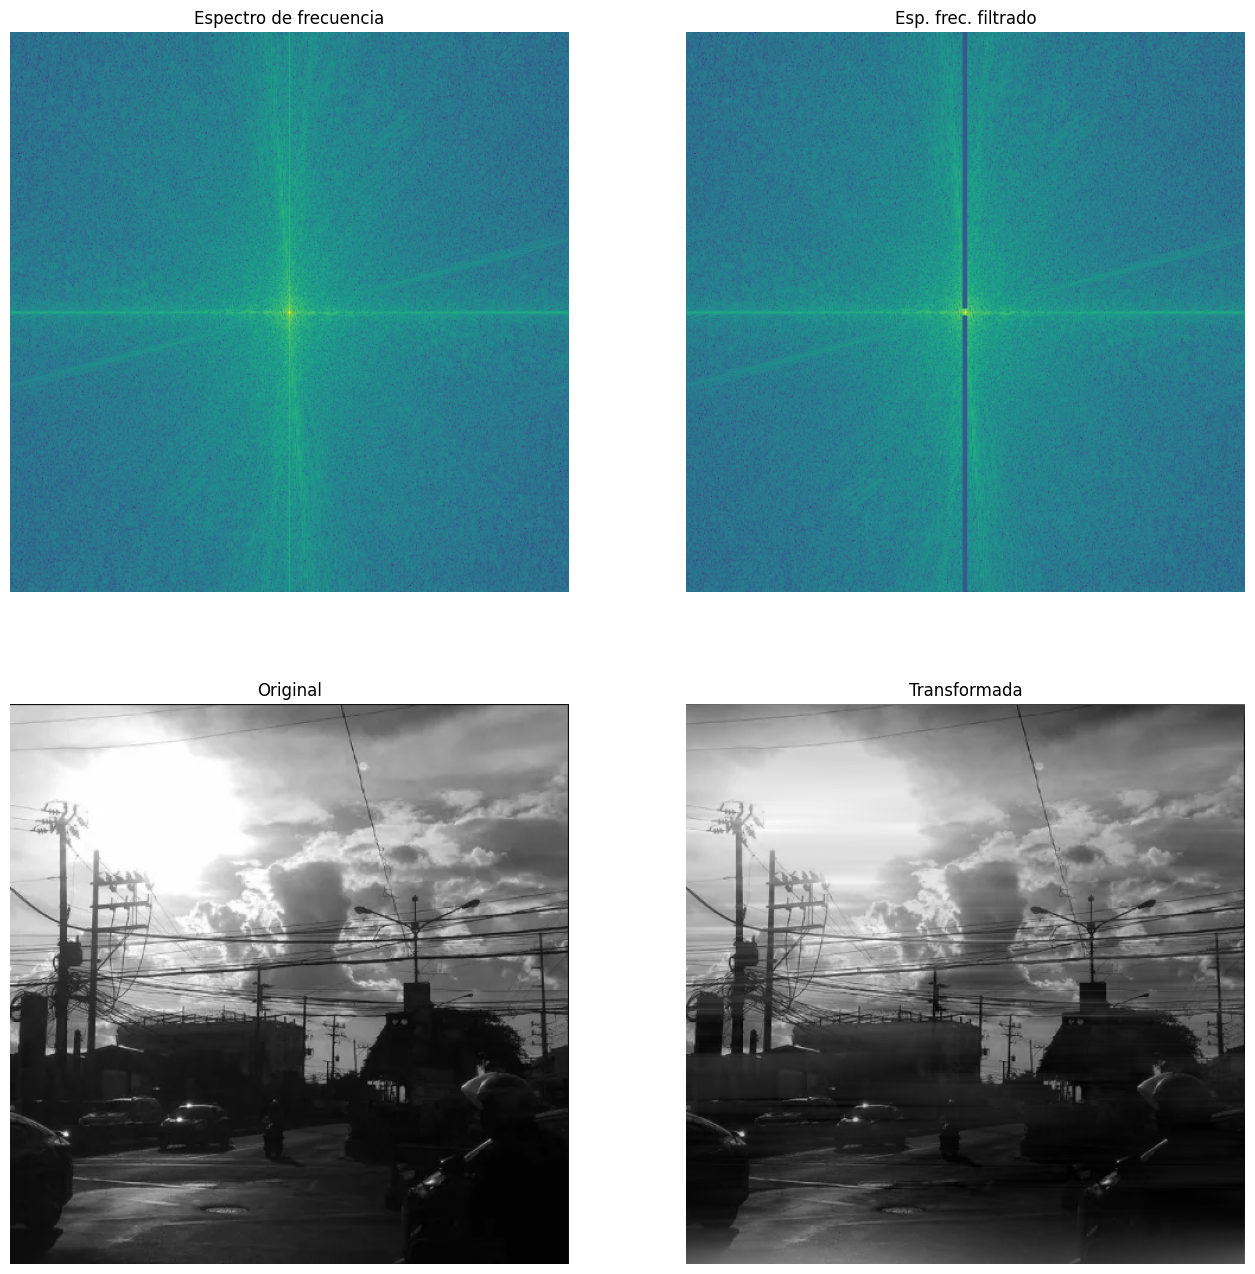

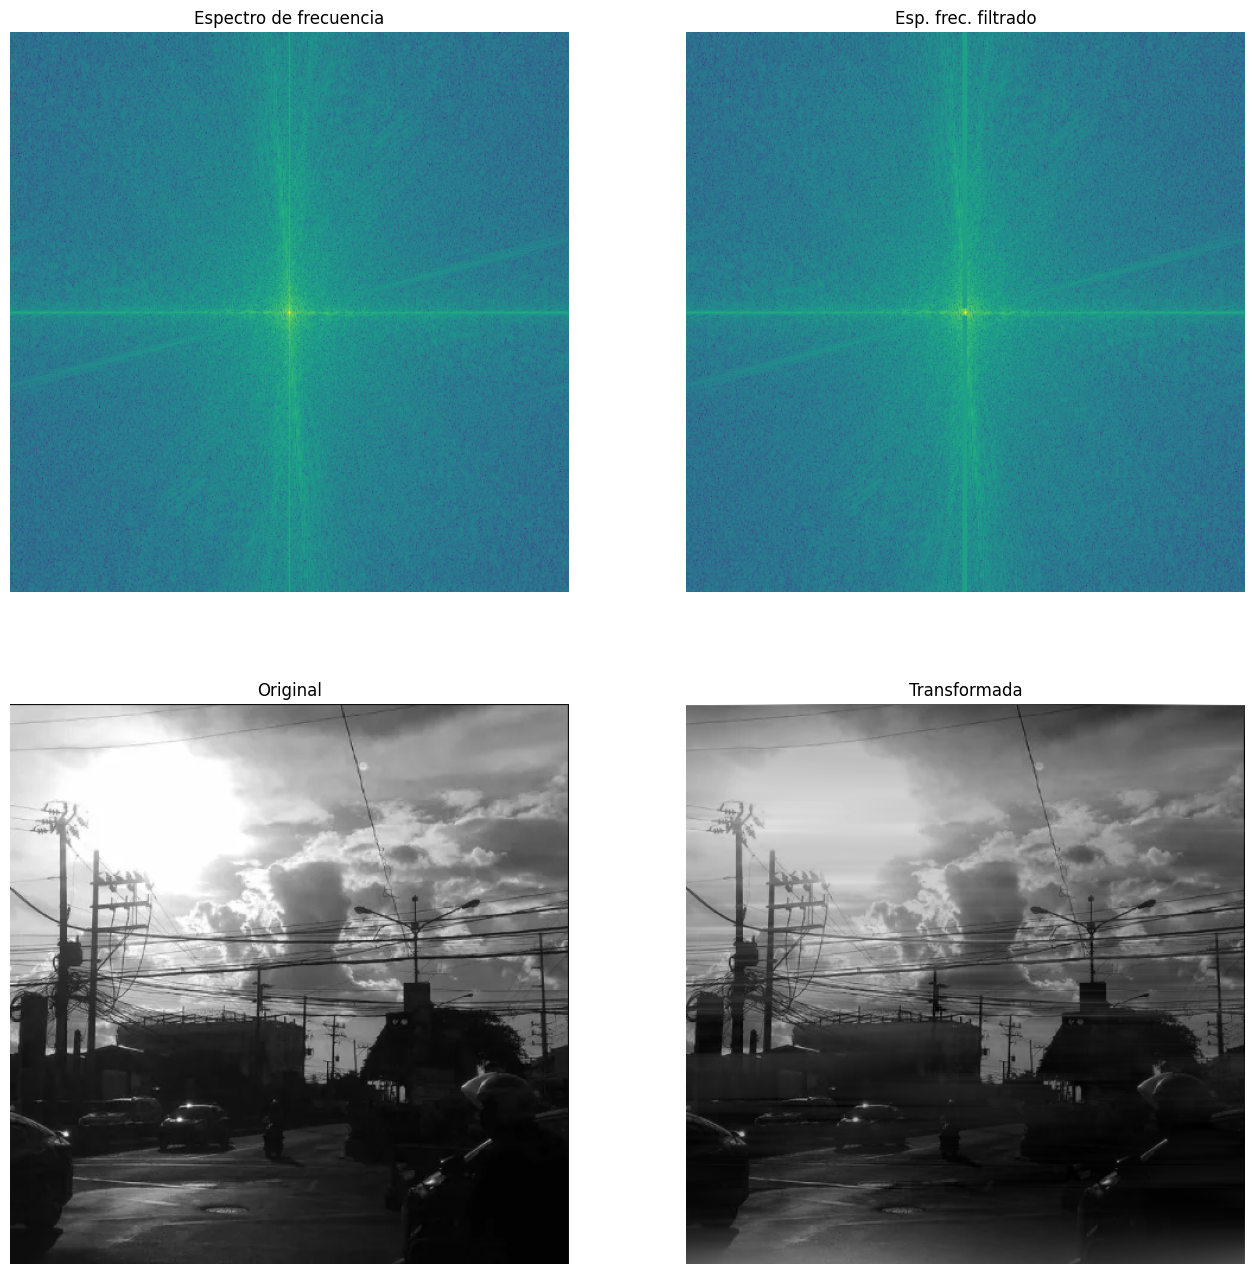

In [ ]:
def fourier_iterator(image, value_list):
    for i in value_list:
        fourier_masker(image, i)

fourier_iterator(img, [0.001, 1, 100])

## Filtrando imagenes a color por canales

In [ ]:
def showImgRgb(img, imgf, imgfmasked, imgtransformed):
    fig, ax = plt.subplots(2, 2, figsize=(16, 16))

    ax[0, 0].set_title('Espectro de frecuencia')
    ax[0, 0].imshow(np.log(abs(imgf)))
    ax[0, 0].axis('off')

    ax[0, 1].set_title('Esp. frec. filtrado')
    ax[0, 1].imshow(np.log(abs(imgfmasked)))
    ax[0, 1].axis('off')

    ax[1, 0].set_title('Original')
    ax[1, 0].imshow(img)
    ax[1, 0].axis('off')

    ax[1, 1].set_title('Transformada')
    ax[1, 1].imshow(imgtransformed)
    ax[1, 1].axis('off')

    plt.show()

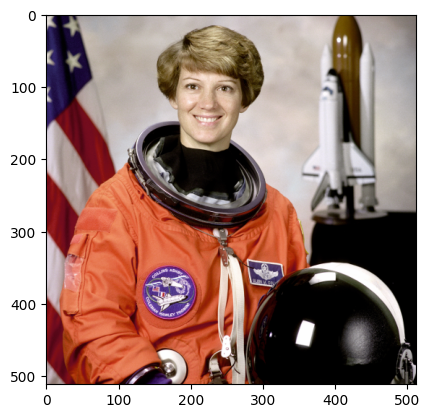

In [ ]:
img = data.astronaut()
plt.imshow(img)

## Espectro imagen a color

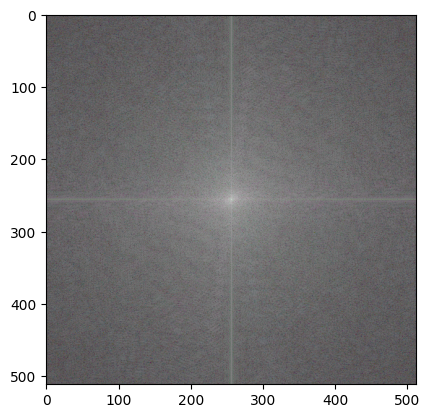

In [ ]:
imgf = np.fft.fftshift(np.fft.fft2(img, axes=(0, 1)))
spec = np.log(np.abs(imgf)) / 20
plt.imshow(spec)

## Filtro pasa baja ideal

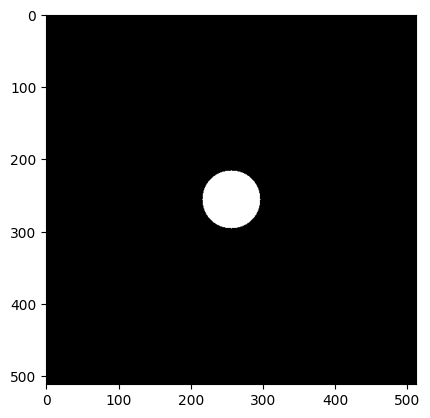

In [ ]:
radius = 40
mask = np.zeros_like(img)
n, m, _ = mask.shape
cx, cy = n // 2, m // 2
cv2.circle(mask, (cx, cy), radius, (255, 255, 255), -1)[0]
plt.imshow(mask)

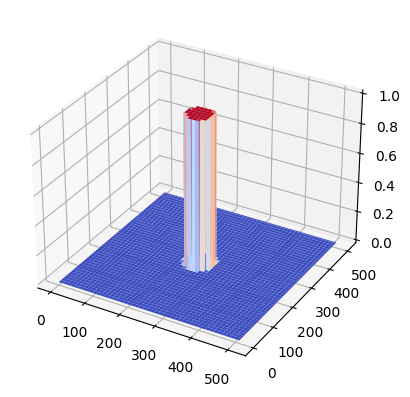

In [ ]:
x, y = np.meshgrid(*map(np.arange, mask.shape[:2]))
z = rgb2gray(mask)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')

<ipython-input-87-aeda284c4645>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(imgfmasked))/20)


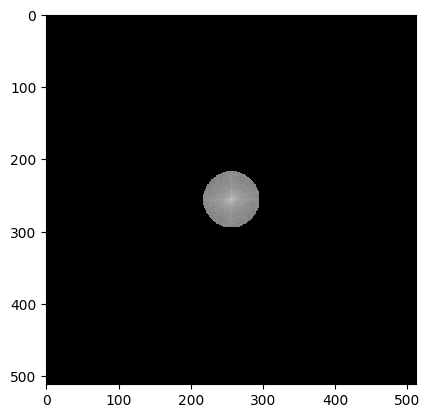

In [ ]:
imgfmasked = np.multiply(imgf, mask) / 255
plt.imshow(np.log(abs(imgfmasked))/20)

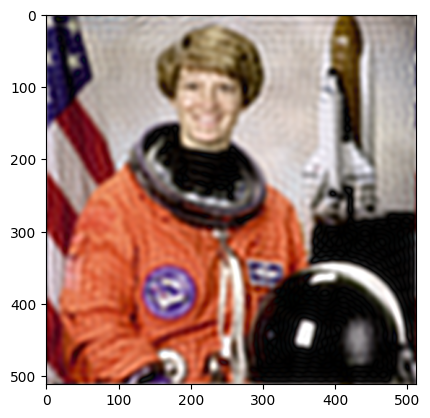

In [ ]:
imgtransformed = abs(
    np.fft.ifft2(np.fft.ifftshift(imgfmasked), axes=(0, 1))
).clip(0, 255).astype(np.uint8)
plt.imshow(imgtransformed)

## borde suave

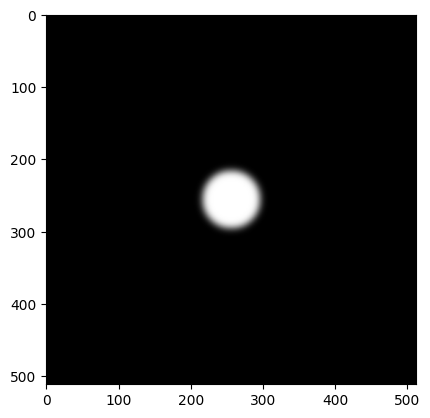

In [ ]:
mask2 = cv2.GaussianBlur(mask, (31, 31), 0)
plt.imshow(mask2)

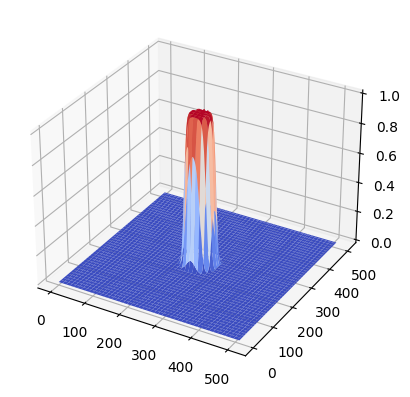

In [ ]:
x, y = np.meshgrid(*map(np.arange, mask2.shape[:2]))
z = rgb2gray(mask2)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(x, y, z, cmap='coolwarm')

<ipython-input-91-c3ebc6a68187>:2: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(abs(imgfmasked))/20)


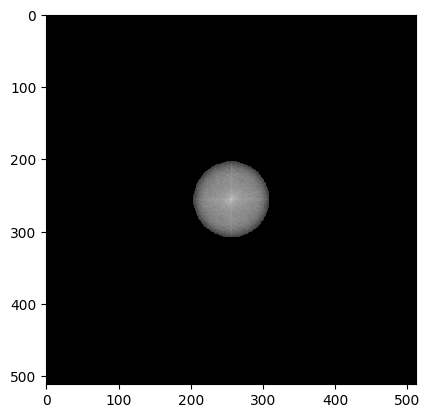

In [ ]:
imgfmasked = np.multiply(imgf, mask2) / 255
plt.imshow(np.log(abs(imgfmasked))/20)

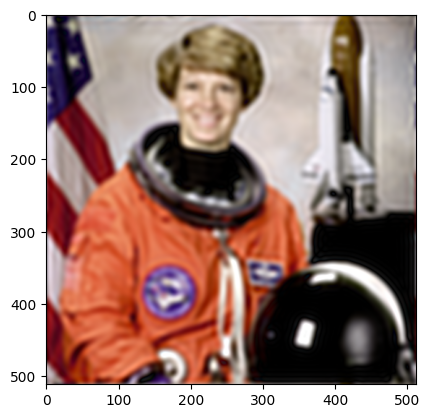

In [ ]:
imgtransformed = abs(
    np.fft.ifft2(np.fft.ifftshift(imgfmasked), axes=(0, 1))
).clip(0, 255).astype(np.uint8)
plt.imshow(imgtransformed)